![](https://www.codehub.gr/wp-content/uploads/2018/01/cropped-CodeHub-logo_320x132.png)

### Linear Regression

In [19]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
# Loading data
data = pd.read_csv('./data/advertising.csv', index_col=0)  # USC Marshall School of Business
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


Text(0, 0.5, 'sales')

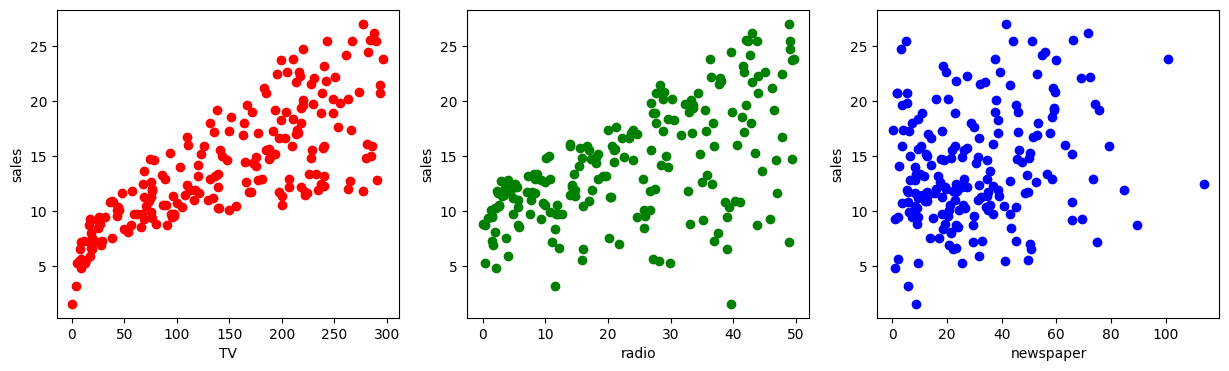

In [21]:
# visualizing data

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)

plt.scatter(data['TV'], data['sales'], color='red')
plt.xlabel('TV')
plt.ylabel('sales')

plt.subplot(1,3,2)
plt.scatter(data['radio'], data['sales'], color = 'green')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['newspaper'], data['sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')

### The model (use only with 1 variable) >> $s𝑎𝑙𝑒𝑠 = 𝛽_{0} + 𝛽_{1} \times 𝑇𝑉$

In [22]:
# get data/targets using pd

X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

In [23]:
# split in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# define the regressor

model = LinearRegression()

In [25]:
# train the model 

model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict

pred_train = model.predict(X_train)
pred_test = model.predict(X_test) 

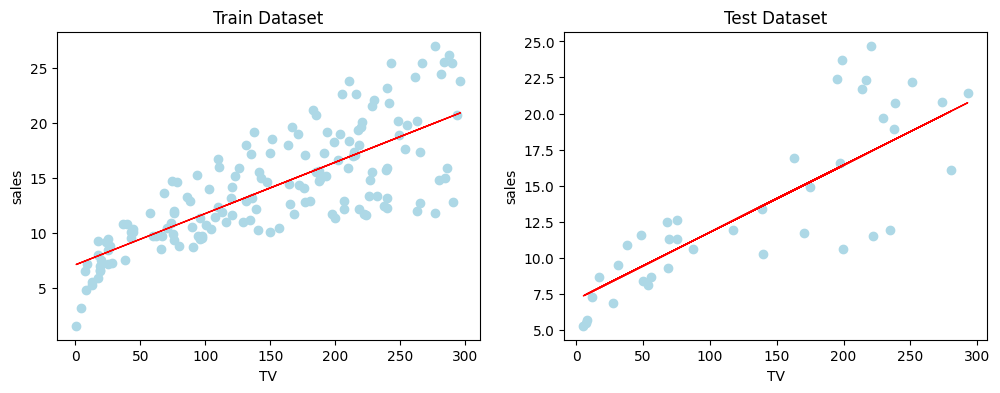

In [9]:
# visualize the regression Line on top of training and testing sets

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color='lightblue')
plt.plot(X_train, pred_train, color='red', linewidth=1)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title("Train Dataset")

plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='lightblue')
plt.plot(X_test, pred_test, color='red', linewidth=1)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title("Test Dataset")

plt.show()

In [10]:
# intercept:
print(model.intercept_)

# slope or x-coefficient
print(model.coef_)

[7.11963843]
[[0.04652973]]


Text(0.5, 1.0, 'Residuals')

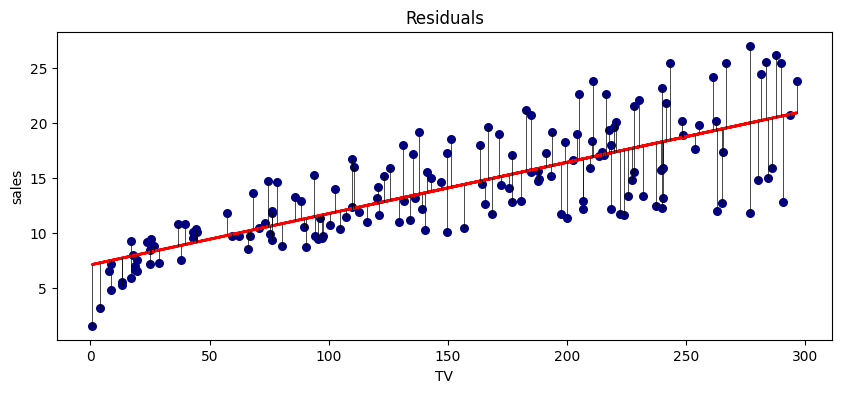

In [11]:
# visualize these residuals

plt.figure(figsize=(10,4))
plt.scatter(X_train, y_train,  color='navy', s=30)
plt.plot(X_train, pred_train, color='red', linewidth=2)

for i in range(X_train.shape[0]):
    plt.plot([X_train[i], X_train[i]], [y_train[i], pred_train[i]], color='black', linewidth=0.5)
    
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("Residuals")

In [12]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}')  

Mean Squared Error: 10.204654118800956
Root Mean Squared Error: 3.194472431998898
Mean Absolute Error: 2.444420003751042


### The model (use all variable) >> $s𝑎𝑙𝑒𝑠 = 𝛽_{0} + 𝛽_{1} \times 𝑇𝑉 + 𝛽_{2} \times radio + 𝛽_{3} \times newspaper$

In [13]:
# get data/targets using values 

X, y = data.values[:, 0:3],  data.values[:, 3]

In [14]:
X.shape, y.shape

((200, 3), (200,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_test = model.predict(X_test) 

In [17]:
print(f'Mean Squared Error: {mean_squared_error(y_test, pred_test)}')  
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred_test))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred_test)}') 

Mean Squared Error: 3.174097353976104
Root Mean Squared Error: 1.7815996615334502
Mean Absolute Error: 1.4607567168117601


In [18]:
from sklearn.metrics import r2_score
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_test))

Coefficient of determination: 0.90
